# Econ 428: Problem Set 1

Franklin She

## Problem 1

### 1. MSE Decomposition

### 2. Linear Regression of a Polynomial Expansion

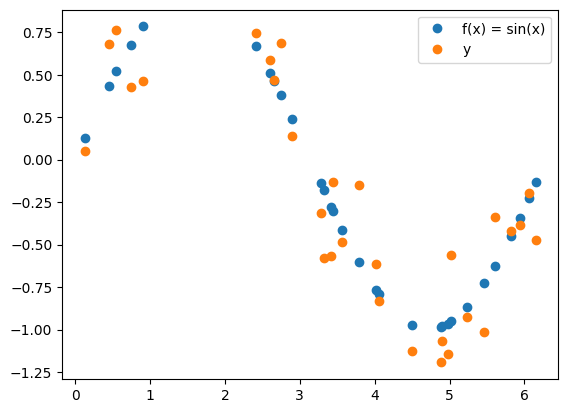

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# (a) 30 samples of f(x) = sin(x)
def create_sample(n=30, seed=0):
    # Set seed for reproducibility
    np.random.seed(seed)

    # Generate pseudo-random x ~ U[0, 2π]
    x = np.random.uniform(0, 2*np.pi, n)

    # Generate Y|X = x ~ N(sin(x), 0.2)
    y = np.random.normal(np.sin(x), 0.2)

    return x, y

# (b) Plot x, f(x), and y
x, y = create_sample()

# Plot x vs sin(x)
plt.plot(x, np.sin(x), 'o', label='f(x) = sin(x)')

# Plot x vs y
plt.plot(x, y, 'o', label='y')

# Plot legend
plt.legend()
plt.show()

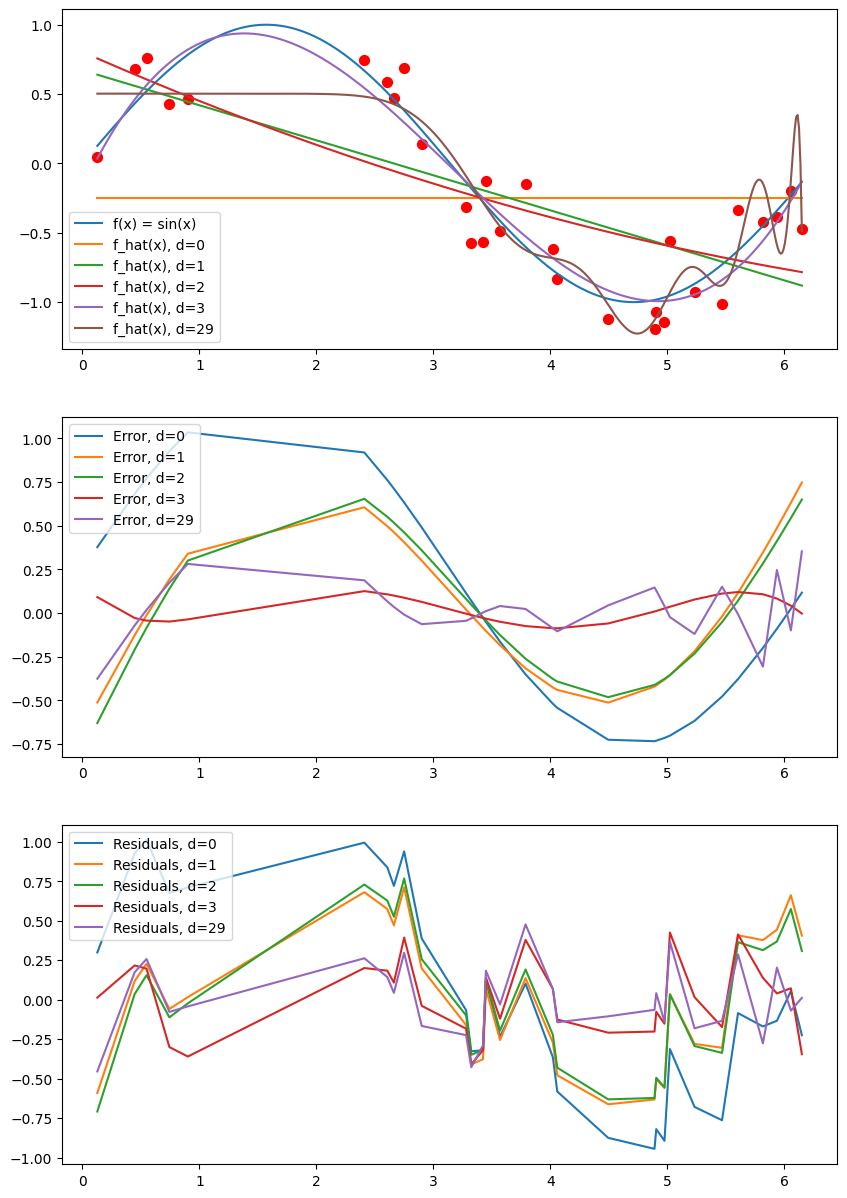

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# (c) Plot true and estimated functions, error, and residuals for d = 0, 1, 2, 3, 29

# Reshape x to be a 2D array
x = x.reshape(-1, 1)

# Sort x and y
sort_idx = np.argsort(x.flatten())
x = x[sort_idx]
y = y[sort_idx]

# Create a figure with 3 subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Generate a set of x values for the smooth function plot
x_smooth = np.linspace(x.min(), x.max(), 500).reshape(-1, 1)

# Plot the true function once
axs[0].plot(x_smooth, np.sin(x_smooth), label='f(x) = sin(x)')

# Loop over the degrees
for d in [0, 1, 2, 3, 29]:
    # Create polynomial features
    poly = PolynomialFeatures(degree=d)
    x_poly = poly.fit_transform(x)
    x_smooth_poly = poly.transform(x_smooth)

    # Fit a linear regression model
    model = LinearRegression().fit(x_poly, y)

    # Predict y values
    y_pred = model.predict(x_poly)
    y_smooth_pred = model.predict(x_smooth_poly)

    # Plot the estimated function
    axs[0].plot(x_smooth, y_smooth_pred, label=f'f_hat(x), d={d}')
    axs[0].legend()

    # Plot the error
    axs[1].plot(x, np.sin(x).flatten() - y_pred, label=f'Error, d={d}')
    axs[1].legend()

    # Plot the residuals
    axs[2].plot(x, y - y_pred, label=f'Residuals, d={d}')
    axs[2].legend()

# Plot the random sample as "fat" dots
axs[0].scatter(x, y, color='red', s=50)

# Show the plots
plt.show()

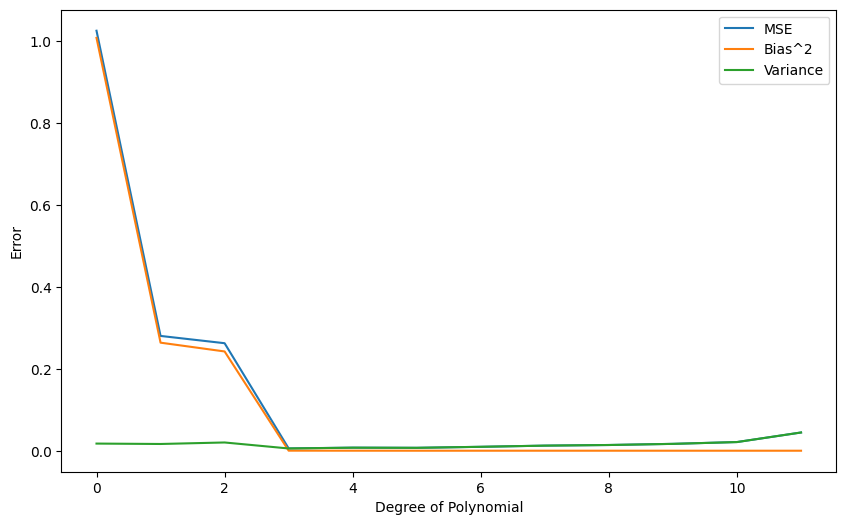

In [4]:
from sklearn.metrics import mean_squared_error

# Initialize arrays to store the results
d = 12
degrees = np.arange(d)
mse_values = np.zeros(d)
bias_values = np.zeros(d)
variance_values = np.zeros(d)
irr_error_values = np.zeros(d)

# Looping over degrees
for d in degrees:
    predictions = np.zeros((1000, 1))  # Store all predictions for the 100 models here

    for i in range(1000):
        x_train, y_train = create_sample(seed=i)
        poly = PolynomialFeatures(degree=d)
        x_poly = poly.fit_transform(x_train.reshape(-1, 1))
        model = LinearRegression().fit(x_poly, y_train)
        x_star = np.array([[1.5 * np.pi]])
        x_star_poly = poly.transform(x_star)
        predictions[i] = model.predict(x_star_poly)[0]

    expected_prediction = predictions.mean()

    true_value = np.sin(1.5 * np.pi)
    mse_values[d] = mean_squared_error([true_value]*1000, predictions)
    bias_values[d] = (true_value - expected_prediction)**2
    variance_values[d] = predictions.var()
    # irr_error_values[d] = mse_values[d] - bias_values[d] - variance_values[d]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(degrees, mse_values, label='MSE')
plt.plot(degrees, bias_values, label='Bias^2')
plt.plot(degrees, variance_values, label='Variance')
# plt.plot(degrees, irr_error_values, label='Irreducible Error')
plt.legend()
plt.xlabel('Degree of Polynomial')
plt.ylabel('Error')
# plt.yscale('log')  # Set y-axis to logarithmic scale
plt.show()

## Problem 2

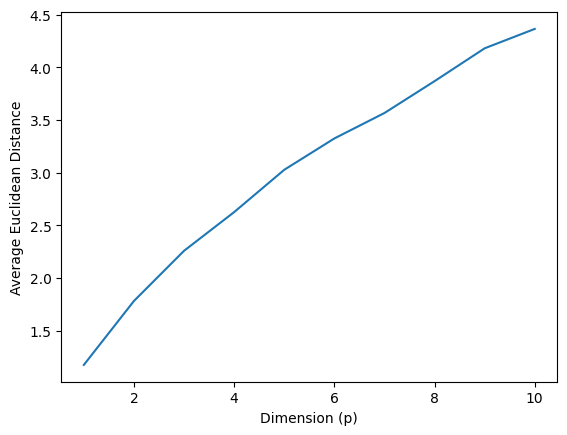

In [5]:
def euclidean_distance(p):
    X1 = np.random.normal(0, 1, p)
    X2 = np.random.normal(0, 1, p)
    return np.sqrt(np.sum((X1 - X2)**2))

p_values = np.arange(1, 11)
avg_distances = []

for p in p_values:
    distances = [euclidean_distance(p) for _ in range(1000)]
    avg_distances.append(np.mean(distances))

plt.plot(p_values, avg_distances)
plt.xlabel('Dimension (p)')
plt.ylabel('Average Euclidean Distance')
plt.show()

This procedure is estimating the expected Euclidean distance between two points randomly drawn from a p-dimensional standard normal distribution. As the dimensionality (p) increases, the average distance between two random points also tends to increase. This is a manifestation of the "curse of dimensionality".

## Problem 3

Prove that the Bayes classifier solves the Bayes problem.

After reflecting feedback on the problem set, consider the following simplification to question3: You may assume that Y is binary, i.e. Y\in {0,1}. I will give 5 bonus points if you have considered (or will consider) the case of discrete but finite Y.

